In this Notebook the basic results of 

"An Artificial Neuron Implemented on an Actual Quantum Processor"

are reproduced.

In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute

import numpy as np


In [2]:
%run -i "Utilities.py"

In [3]:
# Choose the drawer you like best:
#from qiskit.tools.visualization import matplotlib_circuit_drawer as draw
from qiskit.tools.visualization import circuit_drawer as draw

In [4]:
#%matplotlib inline

In [5]:
import matplotlib.pyplot as plt

def show_results(D):
    # D is a dictionary with classical bits as keys and count as value
    # example: D = {'000': 497, '001': 527}
    plt.bar(range(len(D)), list(D.values()), align='center')
    plt.xticks(range(len(D)), list(D.keys()))
    plt.show()

In [6]:
from qiskit import Aer
# See a list of available local simulators
print("Aer backends: ", Aer.backends())

Aer backends:  [<QasmSimulator('qasm_simulator') from AerProvider()>, <StatevectorSimulator('statevector_simulator') from AerProvider()>, <UnitarySimulator('unitary_simulator') from AerProvider()>]


In [7]:
# execute circuit and either display a histogram of the results
def execute_locally(qc, draw_circuit=False):
    # Compile and run the Quantum circuit on a simulator backend
    backend_sim = Aer.get_backend('qasm_simulator')
    job_sim = execute(qc, backend_sim)
    result_sim = job_sim.result()
    result_counts = result_sim.get_counts(qc)
    
    # Print the results
    print("simulation: ", result_sim, result_counts)
    
    if draw_circuit: # draw the circuit
        draw(qc)
    else: # or show the results
        show_results(result_counts)

In [8]:
def new_circuit(size):
    # Create a Quantum Register with size qubits
    qr = QuantumRegister(size)

    # Create a Classical Register with size bits
    cr = ClassicalRegister(size)

    # Create a Quantum Circuit acting on the qr and cr register
    return qr, cr, QuantumCircuit(qr, cr)

An artificial neuron implemented on an actual quantum computer
arXiv: 1811.0226v1

In [9]:
## Mit straight-forward approach 
## N=2

n_0=[0,1]
n_1=[0,1]
n_2=[0,1]
n_3=[0,1]

m_0=[0,1]
m_1=[0,1]
m_2=[0,1]
m_3=[0,1]

l=(0,0)
dicti={l:0}
dicti_t={l:0}


for j_0 in n_0:
    for j_1 in n_1:
        for j_2 in n_2:
            for j_3 in n_3:
                for v_0 in m_0:
                    for v_1 in m_1:
                        for v_2 in m_2:
                            for v_3 in m_3:
                                qr = QuantumRegister(3)
                                cr = ClassicalRegister(1)
                                circuit=QuantumCircuit(qr, cr)
                                circuit.h(qr[0]);
                                circuit.h(qr[1]);
                                i_0=(-1)**(j_0)
                                i_1=(-1)**(j_1)
                                i_2=(-1)**(j_2)
                                i_3=(-1)**(j_3)
                                w_0=(-1)**(v_0)
                                w_1=(-1)**(v_1)
                                w_2=(-1)**(v_2)
                                w_3=(-1)**(v_3)
                                
                                if i_0 == -1:
                                    circuit.x(qr[0]);
                                    circuit.x(qr[1]);
                                    circuit.cz(qr[0], qr[1]);
                                    circuit.x(qr[0]);
                                    circuit.x(qr[1]);
                                if i_1 == -1:
                                    circuit.x(qr[1]);
                                    circuit.cz(qr[0], qr[1]);
                                    circuit.x(qr[1]);    
                                if i_2 == -1:
                                    circuit.x(qr[0]);
                                    circuit.cz(qr[0], qr[1])
                                    circuit.x(qr[0]);
                                if i_3 == -1:
                                    circuit.cz(qr[0], qr[1])
                                if w_0 == -1:
                                    circuit.x(qr[0]);
                                    circuit.x(qr[1]);
                                    circuit.cz(qr[0], qr[1]);
                                    circuit.x(qr[0]);
                                    circuit.x(qr[1]);
                                if w_1 ==-1:
                                    circuit.x(qr[1]);
                                    circuit.cz(qr[0], qr[1]);
                                    circuit.x(qr[1]);    
                                if w_2 == -1:
                                    circuit.x(qr[0]);
                                    circuit.cz(qr[0], qr[1])
                                    circuit.x(qr[0]);
                                if w_3 == -1:
                                    circuit.cz(qr[0], qr[1])
                                        
                                    
                                circuit.h(qr[0]);
                                circuit.h(qr[1]);
                                circuit.x(qr[0]);
                                circuit.x(qr[1]);
                                circuit.ccx(qr[0],qr[1],qr[2])
                                circuit.measure(qr[2], cr[0]);
#                                execute_locally(circuit,draw_circuit=False)
                                backend_sim = Aer.get_backend('qasm_simulator')
                                job_sim = execute(circuit, backend_sim)
                                result_sim = job_sim.result()
                                result_counts = result_sim.get_counts(circuit)    
                                # Print the results
                                #print(result_counts)
                                #show_results(result_counts)
                                #l=(j_0,j_1,j_2,j_3,v_0,v_1,v_2,v_3)
                                k_i=j_0*8+j_1*4+j_2*2+j_3
                                k_w=v_0*8+v_1*4+v_2*2+v_3
                                l=(k_i,k_w)
                                res_1=result_counts.get('1')
                                if res_1==None:
                                    res_1=0
                                dicti[l]=res_1
                                res_0=result_counts.get('0')
                                if res_0==None:
                                    res_0=0
                                dicti[l]=res_1/(res_0+res_1)
                                dicti_t[l]=res_0/(res_0+res_1)

                                



In [10]:
x=[]
y=[]
z=[]
for key in dicti:
    x.append(key[0])
    y.append(key[1])
    z.append(dicti[key])
x=np.array(x)
y=np.array(y)
z=np.array(z)


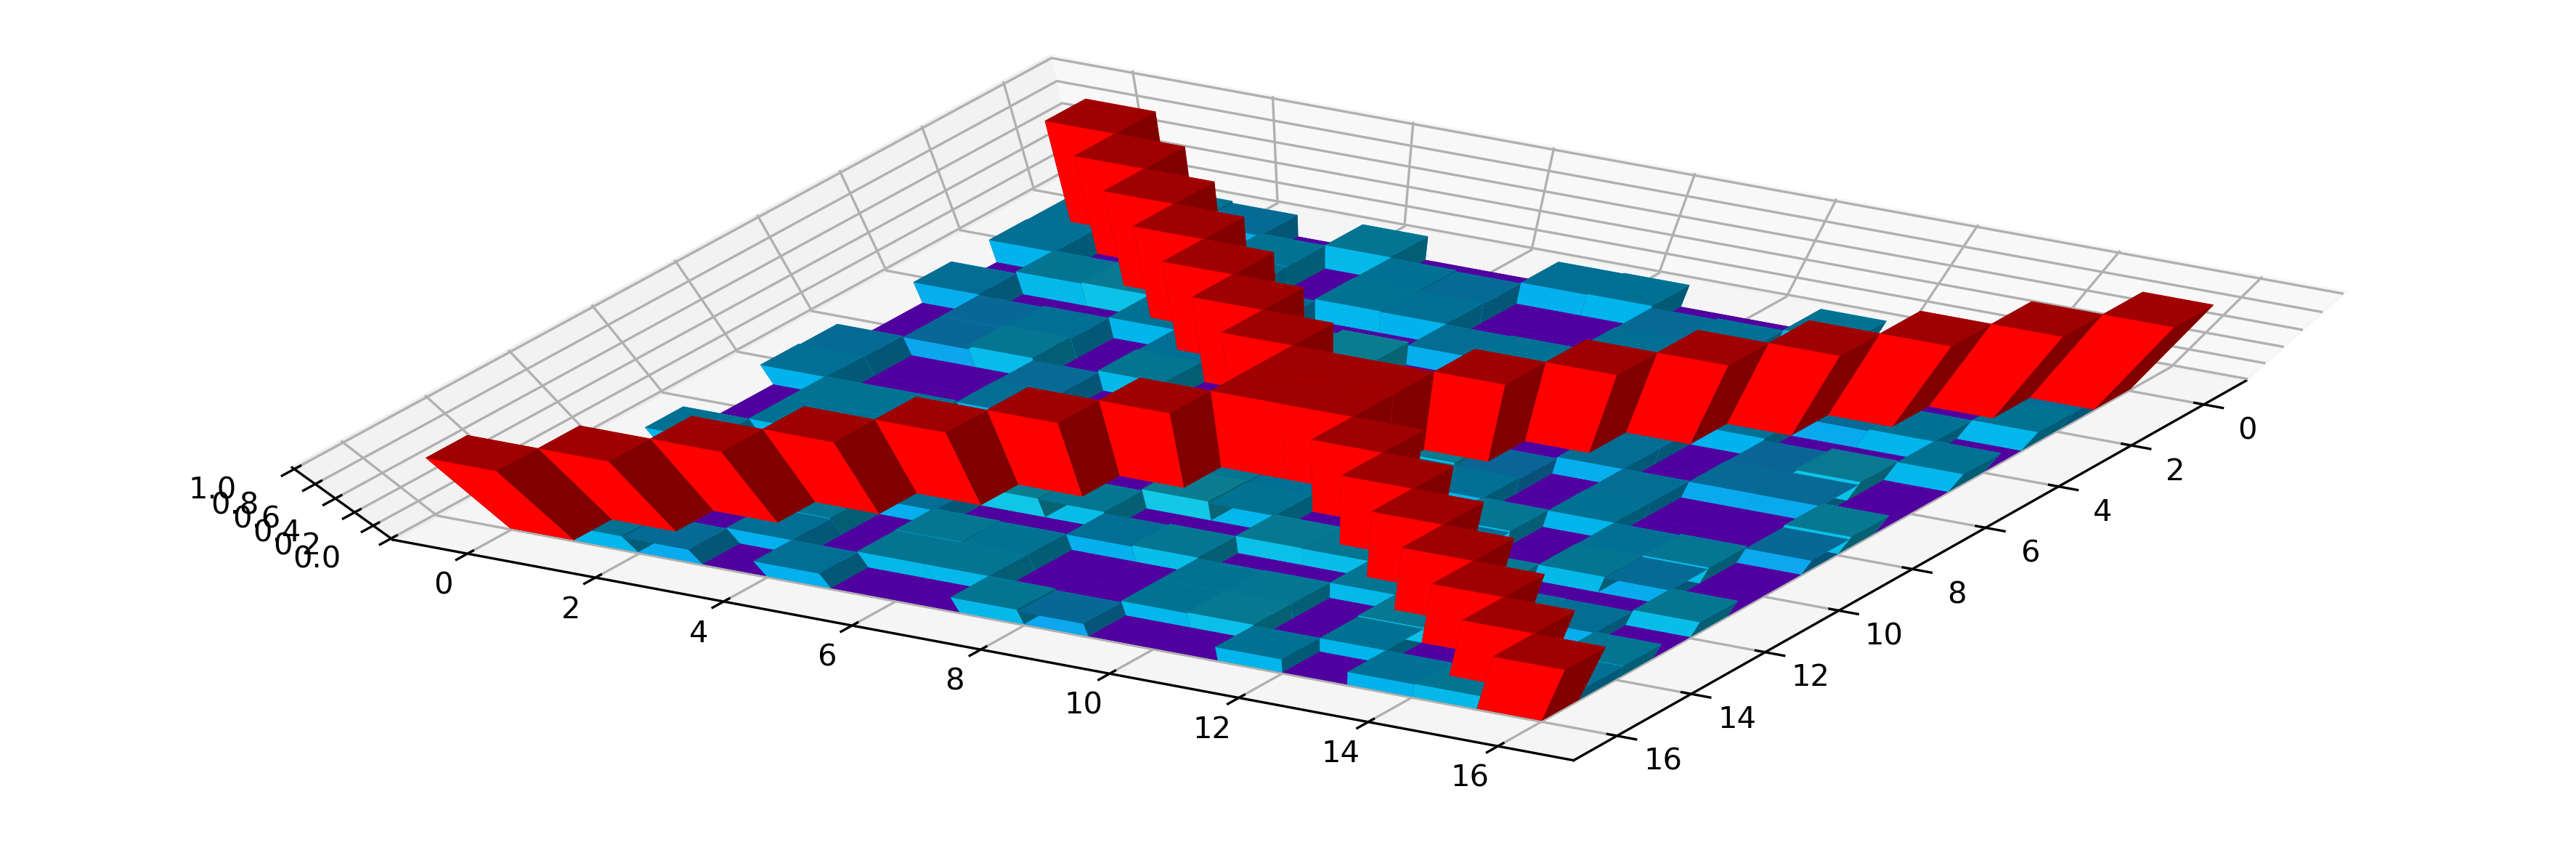

In [11]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from matplotlib import interactive
interactive(True)

# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib.cm as cm   



cmap = cm.get_cmap('rainbow')
max_height = np.max(z)   # get range of colorbars so we can normalize
min_height = np.min(z)
# scale each z to [0,1], and get their rgb values
rgba = [cmap((k-min_height)/max_height) for k in z] 

# setup the figure and axes
fig = plt.figure(figsize=(15, 5),dpi=300)
ax1 = fig.add_subplot(111, projection='3d')

bottom = np.zeros_like(z)
width = depth = 1

ax1.view_init(azim=30,elev=80)
ax1.bar3d(x, y, bottom, width, depth, z, color=rgba)



In [19]:
## Mit zweiter Methode, die insgesamt weniger Gates benötigt !! 
##

n_0=[0,1]
n_1=[0,1]
n_2=[0,1]
n_3=[0,1]

m_0=[0,1]
m_1=[0,1]
m_2=[0,1]
m_3=[0,1]

l=(0,0)
dicti2={l:0}
dicti2_t={l:0}


for j_0 in n_0:
    for j_1 in n_1:
        for j_2 in n_2:
            for j_3 in n_3:
                for v_0 in m_0:
                    for v_1 in m_1:
                        for v_2 in m_2:
                            for v_3 in m_3:
                                qr = QuantumRegister(3)
                                cr = ClassicalRegister(1)
                                circuit=QuantumCircuit(qr, cr)
                                circuit.h(qr[0]);
                                circuit.h(qr[1]);
                                i_0=(-1)**(j_0)
                                i_1=(-1)**(j_1)
                                i_2=(-1)**(j_2)
                                i_3=(-1)**(j_3)
                                w_0=(-1)**(v_0)
                                w_1=(-1)**(v_1)
                                w_2=(-1)**(v_2)
                                w_3=(-1)**(v_3)
                                
                                if i_0 == -1:
                                    i_1=-i_1
                                    i_2=-i_2
                                    i_3=-i_3
                                
                                if i_1 == -1:
                                    circuit.z(qr[1]);  
                                if i_2 == -1:
                                    circuit.z(qr[0]);
                                    
                                if i_3== 1 and i_2==-1:
                                    if i_1==1:
                                        circuit.cz(qr[0], qr[1])
                                if i_3== 1 and i_1==-1:
                                    if i_2==1:
                                        circuit.cz(qr[0], qr[1])       
                                if i_3 == -1 and (i_2==-1 and i_1==-1):
                                    circuit.cz(qr[0], qr[1])     
                                if i_3== -1 and (i_2==1 and i_1==1):
                                    circuit.cz(qr[0], qr[1])
                                
                                if w_0 == -1:
                                    w_1=-w_1
                                    w_2=-w_2
                                    w_3=-w_3
                                
                                if w_1 ==-1:
                                    circuit.z(qr[1]); 
                                if w_2 == -1:
                                    circuit.z(qr[0]); 
                                
                                
                                if w_3== 1 and w_2==-1:
                                    if w_1==1:
                                        circuit.cz(qr[0], qr[1])
                                if w_3== 1 and w_1==-1:
                                    if w_2==1:
                                        circuit.cz(qr[0], qr[1])       
                                if w_3 == -1 and (w_2==-1 and w_1==-1):
                                    circuit.cz(qr[0], qr[1])     
                                if w_3== -1 and (w_2==1 and w_1==1):
                                    circuit.cz(qr[0], qr[1])
                                            
                                circuit.h(qr[0]);
                                circuit.h(qr[1]);
                                circuit.x(qr[0]);
                                circuit.x(qr[1]);
                                circuit.ccx(qr[0],qr[1],qr[2])
                                circuit.measure(qr[2], cr[0]);
#                                execute_locally(circuit,draw_circuit=False)
                                backend_sim = Aer.get_backend('qasm_simulator')
                                job_sim = execute(circuit, backend_sim)
                                result_sim = job_sim.result()
                                result_counts = result_sim.get_counts(circuit)    
                                # Print the results
                                #print(result_counts)
                                #show_results(result_counts)
                                #l=(j_0,j_1,j_2,j_3,v_0,v_1,v_2,v_3)
                                k_i=j_0*8+j_1*4+j_2*2+j_3
                                k_w=v_0*8+v_1*4+v_2*2+v_3
                                l=(k_i,k_w)
                                res_1=result_counts.get('1')
                                if res_1==None:
                                    res_1=0
                                dicti2[l]=res_1
                                res_0=result_counts.get('0')
                                if res_0==None:
                                    res_0=0
                                dicti2[l]=res_1/(res_0+res_1)
                                dicti2_t[l]=res_0/(res_0+res_1)

                                


In [20]:
circuit.draw()

In [21]:
x=[]
y=[]
z=[]
for key in dicti2:
    x.append(key[0])
    y.append(key[1])
    z.append(dicti2[key])
x=np.array(x)
y=np.array(y)
z=np.array(z)


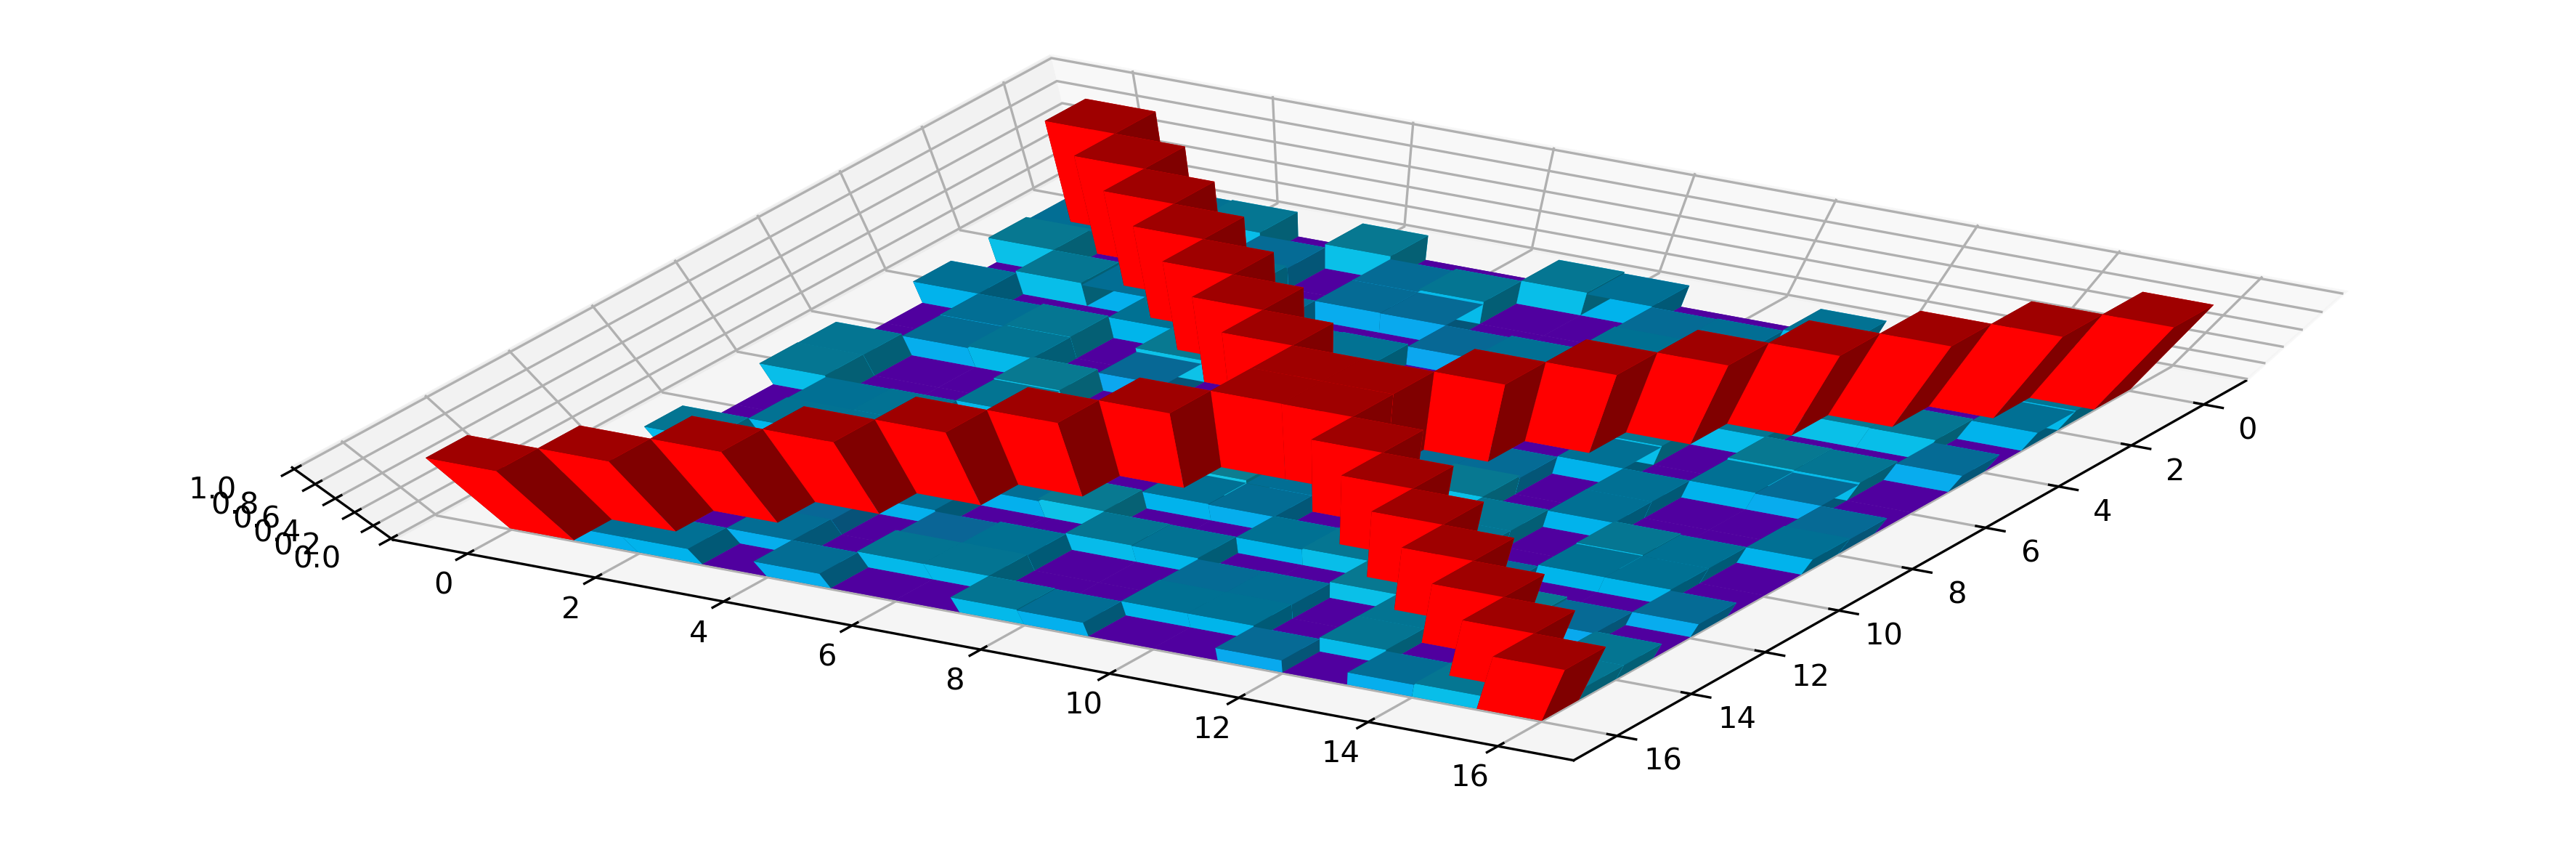

In [22]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from matplotlib import interactive
interactive(True)

# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib.cm as cm   



cmap = cm.get_cmap('rainbow')
max_height = np.max(z)   # get range of colorbars so we can normalize
min_height = np.min(z)
# scale each z to [0,1], and get their rgb values
rgba = [cmap((k-min_height)/max_height) for k in z] 

# setup the figure and axes
fig = plt.figure(figsize=(15, 5),dpi=300)
ax1 = fig.add_subplot(111, projection='3d')

bottom = np.zeros_like(z)
width = depth = 1

ax1.view_init(azim=30,elev=80)
ax1.bar3d(x, y, bottom, width, depth, z, color=rgba)



In [23]:
### N=4
## 3.2.2019
## 
## This code reproduces the results of the above paper .... 

n=np.zeros(16)
m=np.zeros(16)

i=np.ones(16)
w=np.ones(16)

ii=np.ones(16)
ww=np.ones(16)

n[6]=1
n[9]=1
#n[10]=1
#n[11]=1
n[14]=1

m[6]=1
m[9]=1
m[10]=1
m[11]=1
m[14]=1

i=(-i)**n
w=(-w)**m


qr = QuantumRegister(8)
cr = ClassicalRegister(1)
circuit=QuantumCircuit(qr, cr)
circuit.h(qr[0]);
circuit.h(qr[1]);
circuit.h(qr[2]);
circuit.h(qr[3]);

if i[0] == -1:
    i=-i
    
if i[1]==-1:
    circuit.z(qr[0])
    ii[3]=-ii[3]
    ii[5]=-ii[5]
    ii[7]=-ii[7]
    ii[9]=-ii[9]
    ii[11]=-ii[11]
    ii[13]=-ii[13]
    ii[15]=-ii[15]
    
if i[2]==-1:
    circuit.z(qr[1])
    ii[3]=-ii[3]
    ii[6]=-ii[6]
    ii[7]=-ii[7]
    ii[10]=-ii[10]
    ii[11]=-ii[11]
    ii[14]=-ii[14]
    ii[15]=-ii[15]
    
if i[4]==-1:
    circuit.z(qr[2])
    ii[5]=-ii[5]
    ii[6]=-ii[6]
    ii[7]=-ii[7]
    ii[12]=-ii[12]
    ii[13]=-ii[13]
    ii[14]=-ii[14]
    ii[15]=-ii[15]
    
if i[8]==-1:
    circuit.z(qr[3])
    ii[9]=-ii[9]
    ii[10]=-ii[10]
    ii[11]=-ii[11]
    ii[12]=-ii[12]
    ii[13]=-ii[13]
    ii[14]=-ii[14]
    ii[15]=-ii[15]
        
if ii[3] != i[3]:
    circuit.cz(qr[0],qr[1]);
    ii[7]=-ii[7]
    ii[11]=-ii[11]
    ii[15]=-ii[15]

if ii[5] != i[5]:
    circuit.cz(qr[0],qr[2]);
    ii[13]=-ii[13]
    ii[15]=-ii[15]
    ii[7]=-ii[7]

if ii[6] != i[6]:
    circuit.cz(qr[1],qr[2]);
    ii[7]=-ii[7]
    ii[14]=-ii[14]
    ii[15]=-ii[15]
if ii[9] != i[9]:
    circuit.cz(qr[0],qr[3]);
    ii[11]=-ii[11]
    ii[13]=-ii[13]
    ii[15]=-ii[15]
if ii[10] != i[10]:
    circuit.cz(qr[1],qr[3]);
    ii[11]=-ii[11]
    ii[14]=-ii[14]
    ii[15]=-ii[15]
if ii[12] != i[12]:
    circuit.cz(qr[2],qr[3]);
    ii[13]=-ii[13]
    ii[14]=-ii[14]
    ii[15]=-ii[15]

if ii[7] != i[7]:
    controls=[0,1]
    ancillas=[4]
    target=2
    myccz(circuit,qr, controls=controls,target=target,ancillas=ancillas)
    ii[15]=-ii[15]
    circuit.reset(qr[4])
if ii[11] != i[11]:
    controls=[0,1]
    ancillas=[4]
    target=3
    myccz(circuit,qr, controls=controls,target=target,ancillas=ancillas)
    ii[15]=-ii[15]
    circuit.reset(qr[4])
if ii[13] != i[13]:
    controls=[0,2]
    ancillas=[4]
    target=3
    myccz(circuit,qr, controls=controls,target=target,ancillas=ancillas)
    ii[15]=-ii[15]
    circuit.reset(qr[4])
if ii[14] != i[14]:
    controls=[1,2]
    ancillas=[4]
    target=3
    myccz(circuit,qr, controls=controls,target=target,ancillas=ancillas)
    ii[15]=-ii[15]
    circuit.reset(qr[4])
if ii[15] != i[15]:
    controls=[0,1,2]
    ancillas=[4,5]
    target=3
#    mycccz(circuit,qr, controls=controls,target=target,ancillas=ancillas)
    mycccz1(circuit,qr, controls=controls,target=target)
#    circuit.reset(qr[4])
#    circuit.reset(qr[5])
if w[0] == -1:
    w=-w

if w[1]==-1:
    circuit.z(qr[0])
    ww[3]=-ww[3]
    ww[5]=-ww[5]
    ww[7]=-ww[7]
    ww[9]=-ww[9]
    ww[11]=-ww[11]
    ww[13]=-ww[13]
    ww[15]=-ww[15]
    
if w[2]==-1:
    circuit.z(qr[1])
    ww[3]=-ww[3]
    ww[6]=-ww[6]
    ww[7]=-ww[7]
    ww[10]=-ww[10]
    ww[11]=-ww[11]
    ww[14]=-ww[14]
    ww[15]=-ww[15]
    
if w[4]==-1:
    circuit.z(qr[2])
    ww[5]=-ww[5]
    ww[6]=-ww[6]
    ww[7]=-ww[7]
    ww[12]=-ww[12]
    ww[13]=-ww[13]
    ww[14]=-ww[14]
    ww[15]=-ww[15]
    
if w[8]==-1:
    circuit.z(qr[3])
    ww[9]=-ww[9]
    ww[10]=-ww[10]
    ww[11]=-ww[11]
    ww[12]=-ww[12]
    ww[13]=-ww[13]
    ww[14]=-ww[14]
    ww[15]=-ww[15]
    
    
if ww[3] != w[3]:
    circuit.cz(qr[0],qr[1]);
    ww[7]=-ww[7]
    ww[11]=-ww[11]
    ww[15]=-ww[15]
if ww[5] != w[5]:
    circuit.cz(qr[0],qr[2])
    ww[7]=-ww[7]
    ww[13]=-ww[13]
    ww[15]=-ww[15]
if ww[6] != w[6]:
    circuit.cz(qr[1],qr[2]);
    ww[7]=-ww[7]
    ww[14]=-ww[14]
    ww[15]=-ww[15]
if ww[9] != w[9]:
    circuit.cz(qr[0],qr[3]);
    ww[11]=-ww[11]
    ww[13]=-ww[13]
    ww[15]=-ww[15]
if ww[10] != w[10]:
    circuit.cz(qr[1],qr[3]);
    ww[11]=-ww[11]
    ww[14]=-ww[14]
    ww[15]=-ww[15]
if ww[12] != w[12]:
    circuit.cz(qr[2],qr[3]);
    ww[13]=-ww[13]
    ww[14]=-ww[14]
    ww[15]=-ww[15]

if ww[7] != w[7]:
    controls=[0,1]
    ancillas=[4]
    target=2
    myccz(circuit,qr, controls=controls,target=target,ancillas=ancillas)
    ww[15]=-ww[15]
    circuit.reset(qr[4])
if ww[11] != w[11]:
    controls=[0,1]
    ancillas=[4]
    target=3
    myccz(circuit,qr, controls=controls,target=target,ancillas=ancillas)
    ww[15]=-ww[15]
    circuit.reset(qr[4])
if ww[13] != w[13]:
    controls=[0,2]
    ancillas=[4]
    target=3
    myccz(circuit,qr, controls=controls,target=target,ancillas=ancillas)
    ww[15]=-ww[15]
    circuit.reset(qr[4])
if ww[14] != w[14]:
    controls=[1,2]
    ancillas=[4]
    target=3
    myccz(circuit,qr, controls=controls,target=target,ancillas=ancillas)
    ww[15]=-ww[15]
    circuit.reset(qr[4])
if ww[15] != w[15]:
    controls=[0,1,2]
    ancillas=[4,5]
    target=3
#    mycccz(circuit,qr, controls=controls,target=target,ancillas=ancillas)
    mycccz1(circuit,qr, controls=controls,target=target)
    ww[15]=-ww[15] 
#    circuit.reset(qr[4])
#    circuit.reset(qr[5])

circuit.h(qr[0]);
circuit.h(qr[1]);
circuit.h(qr[2]);
circuit.h(qr[3]);

circuit.x(qr[0]);
circuit.x(qr[1]);
circuit.x(qr[2]);
circuit.x(qr[3]);

## Multicontrolled X-Gate
circuit.ccx(qr[0],qr[1],qr[4])
circuit.ccx(qr[2],qr[4],qr[5])
circuit.ccx(qr[3],qr[5],qr[6])
circuit.cx(qr[6],qr[7])

circuit.measure(qr[7], cr[0]);
#                                execute_locally(circuit,draw_circuit=False)
backend_sim = Aer.get_backend('qasm_simulator')
#backend_sim = Aer.get_backend('unitary_simulator')
job_sim = execute(circuit, backend_sim)
result_sim = job_sim.result()
result_counts = result_sim.get_counts(circuit)    
# Print the results
print(result_counts)
res_1=result_counts.get('1')
if res_1==None:
    res_1=0
    
res_0=result_counts.get('0')
if res_0==None:
    res_0=0
print(res_1/(res_0+res_1))
print(res_0/(res_0+res_1))


{'0': 467, '1': 557}
0.5439453125
0.4560546875


In [26]:
### N=2
## 25.1.2019
## check if method applied to N=4 works properly for N=2 => okay
##

n=np.zeros(16)
m=np.zeros(16)
i=np.ones(16)
w=np.ones(16)
ii=np.ones(16)
ww=np.ones(16)

n[1]=1
n[3]=1
n[2]=1

m[1]=1
#m[3]=1
m[2]=1

i=(-i)**n
w=(-w)**m


qr = QuantumRegister(8)
cr = ClassicalRegister(1)
circuit=QuantumCircuit(qr, cr)
circuit.h(qr[0]);
circuit.h(qr[1]);

if i[0] == -1:
    i=-i
    
if i[1]==-1:
    circuit.z(qr[1])
    ii[1]=-ii[1]
    ii[3]=-ii[3]

if i[2]==-1:
    circuit.z(qr[0])
    ii[2]=-ii[2]
    ii[3]=-ii[3]

if ii[3] != i[3]:
    circuit.cz(qr[0],qr[1]);
    ii[3]=-ii[3]
    
###########################

if w[0] == -1:
    w=-w

if w[1]==-1:
    circuit.z(qr[1])
    ww[1]=-ww[1]
    ww[3]=-ww[3]

if w[2]==-1:
    circuit.z(qr[0])
    ww[2]=-ww[2]
    ww[3]=-ww[3]

if ww[3] != w[3]:
    circuit.cz(qr[0],qr[1]);
    ww[3]=-ww[3]
                 
circuit.h(qr[0]);
circuit.h(qr[1]);


circuit.x(qr[0]);
circuit.x(qr[1]);

## Multicontrolled X-Gate
circuit.ccx(qr[0],qr[1],qr[7])

circuit.measure(qr[7], cr[0]);
#                                execute_locally(circuit,draw_circuit=False)
backend_sim = Aer.get_backend('qasm_simulator')
#backend_sim = Aer.get_backend('unitary_simulator')
job_sim = execute(circuit, backend_sim)
result_sim = job_sim.result()
result_counts = result_sim.get_counts(circuit)    
# Print the results
print(result_counts)
res_1=result_counts.get('1')
if res_1==None:
    res_1=0
    
res_0=result_counts.get('0')
if res_0==None:
    res_0=0
print(res_1/(res_0+res_1))
print(res_0/(res_0+res_1))


{'0': 760, '1': 264}
0.2578125
0.7421875


In [ ]:
## N=2, check results for individual configurations ....
## + gradient descent ! 

j_0=0
j_1=1
j_2=1
j_3=1

v_0=0
v_1=0
v_2=0
v_3=0

i_0=(-1)**(j_0)
i_1=(-1)**(j_1)
i_2=(-1)**(j_2)
i_3=(-1)**(j_3)

w_0=(-1)**(v_0)
w_1=(-1)**(v_1)
w_2=(-1)**(v_2)
w_3=(-1)**(v_3)

Loss_o=100

for k in range(0,5):
    Loss_o=Loss
    qr = QuantumRegister(3)
    cr = ClassicalRegister(1)
    circuit=QuantumCircuit(qr, cr)
    circuit.h(qr[0]);
    circuit.h(qr[1]);

    if i_0 == -1:
        i_0=-i_0
        i_1=-i_1
        i_2=-i_2
        i_3=-i_3

    if i_1 == -1:
        circuit.z(qr[1]);  
    if i_2 == -1:
        circuit.z(qr[0]);

    if i_3== 1 and i_2==-1:
        if i_1==1:
            circuit.cz(qr[0], qr[1])
    if i_3== 1 and i_1==-1:
        if i_2==1:
            circuit.cz(qr[0], qr[1])       
    if i_3 == -1 and (i_2==-1 and i_1==-1):
        circuit.cz(qr[0], qr[1])     
    if i_3== -1 and (i_2==1 and i_1==1):
        circuit.cz(qr[0], qr[1])

    if w_0 == -1:
        w_0=-w_0
        w_1=-w_1
        w_2=-w_2
        w_3=-w_3

    if w_1 ==-1:
        circuit.z(qr[1]); 
    if w_2 == -1:
        circuit.z(qr[0]); 


    if w_3== 1 and w_2==-1:
        if w_1==1:
            circuit.cz(qr[0], qr[1])
    if w_3== 1 and w_1==-1:
        if w_2==1:
            circuit.cz(qr[0], qr[1])       
    if w_3 == -1 and (w_2==-1 and w_1==-1):
        circuit.cz(qr[0], qr[1])     
    if w_3== -1 and (w_2==1 and w_1==1):
        circuit.cz(qr[0], qr[1])

    circuit.h(qr[0]);
    circuit.h(qr[1]);
    circuit.x(qr[0]);
    circuit.x(qr[1]);
    circuit.ccx(qr[0],qr[1],qr[2])
    circuit.measure(qr[2], cr[0]);
    #                                execute_locally(circuit,draw_circuit=False)
    backend_sim = Aer.get_backend('qasm_simulator')
    job_sim = execute(circuit, backend_sim)
    result_sim = job_sim.result()
    result_counts = result_sim.get_counts(circuit)    
    # Print the results
    print(result_counts)
    res_1=result_counts.get('1')
    if res_1==None:
        res_1=0

    res_0=result_counts.get('0')
    if res_0==None:
        res_0=0
    res_1=res_1/(res_0+res_1)    
    res_0=res_0/(res_0+res_1) 
#    print(res_1)
#    print(res_0)

    Loss=(1.0-res_1)**2
#    print('Loss:',Loss)
#    print('w_0:',w_0)
#    print('w_1:',w_1)
#    print('w_2:',w_2)
#    print('w_3:',w_3)
    if Loss > Loss_o:
        w_0=w_0s
        w_1=w_1s
        w_2=w_2s
        w_3=w_3s        
        break
    else:
        dL0=-2*i_0*(1-res_1)
        dL1=-2*i_1*(1-res_1)
        dL2=-2*i_2*(1-res_1)
        dL3=-2*i_3*(1-res_1)
#
        w_0s=w_0
        w_1s=w_1
        w_2s=w_2
        w_3s=w_3
        w_0=w_0-dL0
        if w_0 >= 0:
            w_0 = 1;
        if w_0 < 0:
            w_0 = -1;

        w_1=w_1-dL1
        if w_1 >= 0:
            w_1 = 1;
        if w_1 < 0:
            w_1 = -1;

        w_2=w_1-dL2
        if w_2 >= 0:
            w_2 = 1;
        if w_2 < 0:
            w_2 = -1;

        w_3=w_1-dL3
        if w_3 >= 0:
            w_3 = 1;
        if w_3 < 0:
            w_3 = -1;

    
#        
#
print('Loss:',Loss_o)
#
print()
print('i_0:',i_0)
print('i_1:',i_1)
print('i_2:',i_2)
print('i_3:',i_3)
#
print()
print('w_0:',w_0)
print('w_1:',w_1)
print('w_2:',w_2)
print('w_3:',w_3)



In [ ]:
### N=4
## 3.2.2019
## 
## This code reproduces the results of the above paper .... 
## + gradient descent 

n=np.zeros(16)
m=np.zeros(16)
dL=np.zeros(16)

i=np.ones(16)
w=np.ones(16)
ws=np.ones(16)

ii=np.ones(16)
ww=np.ones(16)

#n[6]=1
#n[9]=1
#n[10]=1
#n[11]=1
#n[14]=1

#n[3]=1
n[13]=1
n[4]=1
n[9]=1

i=(-i)**n
w=(-w)**m

Loss_o=100
Loss=100

for k in range(0,20):
    Loss_o=Loss

    qr = QuantumRegister(8)
    cr = ClassicalRegister(1)
    circuit=QuantumCircuit(qr, cr)
    circuit.h(qr[0]);
    circuit.h(qr[1]);
    circuit.h(qr[2]);
    circuit.h(qr[3]);

    if i[0] == -1:
        i=-i

    if i[1]==-1:
        circuit.z(qr[0])
        ii[3]=-ii[3]
        ii[5]=-ii[5]
        ii[7]=-ii[7]
        ii[9]=-ii[9]
        ii[11]=-ii[11]
        ii[13]=-ii[13]
        ii[15]=-ii[15]

    if i[2]==-1:
        circuit.z(qr[1])
        ii[3]=-ii[3]
        ii[6]=-ii[6]
        ii[7]=-ii[7]
        ii[10]=-ii[10]
        ii[11]=-ii[11]
        ii[14]=-ii[14]
        ii[15]=-ii[15]

    if i[4]==-1:
        circuit.z(qr[2])
        ii[5]=-ii[5]
        ii[6]=-ii[6]
        ii[7]=-ii[7]
        ii[12]=-ii[12]
        ii[13]=-ii[13]
        ii[14]=-ii[14]
        ii[15]=-ii[15]

    if i[8]==-1:
        circuit.z(qr[3])
        ii[9]=-ii[9]
        ii[10]=-ii[10]
        ii[11]=-ii[11]
        ii[12]=-ii[12]
        ii[13]=-ii[13]
        ii[14]=-ii[14]
        ii[15]=-ii[15]

    if ii[3] != i[3]:
        circuit.cz(qr[0],qr[1]);
        ii[7]=-ii[7]
        ii[11]=-ii[11]
        ii[15]=-ii[15]

    if ii[5] != i[5]:
        circuit.cz(qr[0],qr[2]);
        ii[13]=-ii[13]
        ii[15]=-ii[15]
        ii[7]=-ii[7]

    if ii[6] != i[6]:
        circuit.cz(qr[1],qr[2]);
        ii[7]=-ii[7]
        ii[14]=-ii[14]
        ii[15]=-ii[15]
    if ii[9] != i[9]:
        circuit.cz(qr[0],qr[3]);
        ii[11]=-ii[11]
        ii[13]=-ii[13]
        ii[15]=-ii[15]
    if ii[10] != i[10]:
        circuit.cz(qr[1],qr[3]);
        ii[11]=-ii[11]
        ii[14]=-ii[14]
        ii[15]=-ii[15]
    if ii[12] != i[12]:
        circuit.cz(qr[2],qr[3]);
        ii[13]=-ii[13]
        ii[14]=-ii[14]
        ii[15]=-ii[15]

    if ii[7] != i[7]:
        controls=[0,1]
        ancillas=[4]
        target=2
        myccz(circuit,qr, controls=controls,target=target,ancillas=ancillas)
        ii[15]=-ii[15]
        circuit.reset(qr[4])
    if ii[11] != i[11]:
        controls=[0,1]
        ancillas=[4]
        target=3
        myccz(circuit,qr, controls=controls,target=target,ancillas=ancillas)
        ii[15]=-ii[15]
        circuit.reset(qr[4])
    if ii[13] != i[13]:
        controls=[0,2]
        ancillas=[4]
        target=3
        myccz(circuit,qr, controls=controls,target=target,ancillas=ancillas)
        ii[15]=-ii[15]
        circuit.reset(qr[4])
    if ii[14] != i[14]:
        controls=[1,2]
        ancillas=[4]
        target=3
        myccz(circuit,qr, controls=controls,target=target,ancillas=ancillas)
        ii[15]=-ii[15]
        circuit.reset(qr[4])
    if ii[15] != i[15]:
        controls=[0,1,2]
        ancillas=[4,5]
        target=3
    #    mycccz(circuit,qr, controls=controls,target=target,ancillas=ancillas)
        mycccz1(circuit,qr, controls=controls,target=target)
    #    circuit.reset(qr[4])
    #    circuit.reset(qr[5])
    if w[0] == -1:
        w=-w

    if w[1]==-1:
        circuit.z(qr[0])
        ww[3]=-ww[3]
        ww[5]=-ww[5]
        ww[7]=-ww[7]
        ww[9]=-ww[9]
        ww[11]=-ww[11]
        ww[13]=-ww[13]
        ww[15]=-ww[15]

    if w[2]==-1:
        circuit.z(qr[1])
        ww[3]=-ww[3]
        ww[6]=-ww[6]
        ww[7]=-ww[7]
        ww[10]=-ww[10]
        ww[11]=-ww[11]
        ww[14]=-ww[14]
        ww[15]=-ww[15]

    if w[4]==-1:
        circuit.z(qr[2])
        ww[5]=-ww[5]
        ww[6]=-ww[6]
        ww[7]=-ww[7]
        ww[12]=-ww[12]
        ww[13]=-ww[13]
        ww[14]=-ww[14]
        ww[15]=-ww[15]

    if w[8]==-1:
        circuit.z(qr[3])
        ww[9]=-ww[9]
        ww[10]=-ww[10]
        ww[11]=-ww[11]
        ww[12]=-ww[12]
        ww[13]=-ww[13]
        ww[14]=-ww[14]
        ww[15]=-ww[15]


    if ww[3] != w[3]:
        circuit.cz(qr[0],qr[1]);
        ww[7]=-ww[7]
        ww[11]=-ww[11]
        ww[15]=-ww[15]
    if ww[5] != w[5]:
        circuit.cz(qr[0],qr[2])
        ww[7]=-ww[7]
        ww[13]=-ww[13]
        ww[15]=-ww[15]
    if ww[6] != w[6]:
        circuit.cz(qr[1],qr[2]);
        ww[7]=-ww[7]
        ww[14]=-ww[14]
        ww[15]=-ww[15]
    if ww[9] != w[9]:
        circuit.cz(qr[0],qr[3]);
        ww[11]=-ww[11]
        ww[13]=-ww[13]
        ww[15]=-ww[15]
    if ww[10] != w[10]:
        circuit.cz(qr[1],qr[3]);
        ww[11]=-ww[11]
        ww[14]=-ww[14]
        ww[15]=-ww[15]
    if ww[12] != w[12]:
        circuit.cz(qr[2],qr[3]);
        ww[13]=-ww[13]
        ww[14]=-ww[14]
        ww[15]=-ww[15]

    if ww[7] != w[7]:
        controls=[0,1]
        ancillas=[4]
        target=2
        myccz(circuit,qr, controls=controls,target=target,ancillas=ancillas)
        ww[15]=-ww[15]
        circuit.reset(qr[4])
    if ww[11] != w[11]:
        controls=[0,1]
        ancillas=[4]
        target=3
        myccz(circuit,qr, controls=controls,target=target,ancillas=ancillas)
        ww[15]=-ww[15]
        circuit.reset(qr[4])
    if ww[13] != w[13]:
        controls=[0,2]
        ancillas=[4]
        target=3
        myccz(circuit,qr, controls=controls,target=target,ancillas=ancillas)
        ww[15]=-ww[15]
        circuit.reset(qr[4])
    if ww[14] != w[14]:
        controls=[1,2]
        ancillas=[4]
        target=3
        myccz(circuit,qr, controls=controls,target=target,ancillas=ancillas)
        ww[15]=-ww[15]
        circuit.reset(qr[4])
    if ww[15] != w[15]:
        controls=[0,1,2]
        ancillas=[4,5]
        target=3
    #    mycccz(circuit,qr, controls=controls,target=target,ancillas=ancillas)
        mycccz1(circuit,qr, controls=controls,target=target)
        ww[15]=-ww[15] 
    #    circuit.reset(qr[4])
    #    circuit.reset(qr[5])

    circuit.h(qr[0]);
    circuit.h(qr[1]);
    circuit.h(qr[2]);
    circuit.h(qr[3]);

    circuit.x(qr[0]);
    circuit.x(qr[1]);
    circuit.x(qr[2]);
    circuit.x(qr[3]);

    ## Multicontrolled X-Gate
    circuit.ccx(qr[0],qr[1],qr[4])
    circuit.ccx(qr[2],qr[4],qr[5])
    circuit.ccx(qr[3],qr[5],qr[6])
    circuit.cx(qr[6],qr[7])

    circuit.measure(qr[7], cr[0]);
    #                                execute_locally(circuit,draw_circuit=False)
    backend_sim = Aer.get_backend('qasm_simulator')
#    backend_sim = Aer.get_backend('unitary_simulator')
    job_sim = execute(circuit, backend_sim)
    result_sim = job_sim.result()
    result_counts = result_sim.get_counts(circuit)    
    # Print the results
    print(result_counts)
    res_1=result_counts.get('1')
    if res_1==None:
        res_1=0
    res_0=result_counts.get('0')
    if res_0==None:
        res_0=0
    res_1=res_1/(res_0+res_1)    
    res_0=res_0/(res_0+res_1) 
#
    Loss=(1.0-res_1)**2
    print('Temp Loss:',Loss)
#    print('w_0:',w_0)
#    print('w_1:',w_1)
#    print('w_2:',w_2)
#    print('w_3:',w_3)
    if Loss > Loss_o and k>5:
    #if Loss > Loss_o:
        for g in range(0,16):
            w[g]=ws[g]      
        break
    else:
        for g in range(0,16):
            dL[g]=-2*i[g]*(1-res_1)
            ws[g]=w[g]
            w[g]=w[g]-dL[g]
            if w[g] >= 0:
                w[g] = 1;
            if w[g] < 0:
                w[g] = -1;
#        
#
print('Final Loss:',Loss_o)
#
print()
for g in range(0,16):
    print('i',g,':',i[g])
for g in range(0,16):
    print('w',g,':',w[g])
for g in range(0,16):
    print('delta:',i[g]-w[g])
    




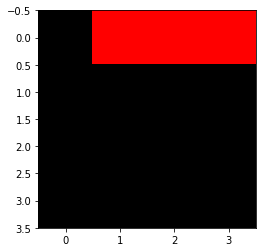

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# random data
x = i.reshape(4,4)


fig, ax = plt.subplots()

# define the colors
cmap = mpl.colors.ListedColormap(['r', 'k'])

# create a normalize object the describes the limits of
# each color
bounds = [0., 0.5, 1.]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# plot it
ax.imshow(x, interpolation='none', cmap=cmap, norm=norm)

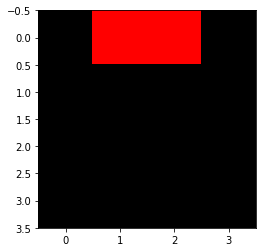

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# random data
y=  w.reshape(4,4)

fig, ax = plt.subplots()

# define the colors
cmap = mpl.colors.ListedColormap(['r', 'k'])

# create a normalize object the describes the limits of
# each color
bounds = [0., 0.5, 1.]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# plot it
ax.imshow(y, interpolation='none', cmap=cmap, norm=norm)